# Project:  Human Development Index (HDI) Indicators from Gapminder

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The [Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index) (HDI) represents the standard-of-living in a country based on three indicators:
    - Life expectancy at birth (LEI),
    - Gross national income per capita (GNI),
    - Mean years of education (MEI & WEI for men and women).

The Gapminder database provides datasets for each of these indicators; however, the education level is given by two datasets based on gender rather than a single composite indicator as used in the calculation of the HDI.  The HDI ranges between 0.0 and 1.0.  The higher these indicators, the higher the HDI.  Accordingly, exploratory data analysis should reveal fairly strong correlations among them.  It would be interesting to see the relative strengths and nature of these indicators with respect to the HDI.

In [1]:
import pandas as pd
import csv
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The datasets from Gapminder are
    - HDI:  Human Development Index
    - GNI:  Total GNI (PPP, current international $)
    - MEI:  Mean years in school (men 25 years and older)
    - WEI:  Mean years in school (women 25 years and older)
    - LEI:  Life expectancy at birth
converted from excel to csv format.

Rows for each dataset are a list of countries, and columns are years.  Which countries and years are included varied among the datasets, so an immediate task is to standardize these metrics for analysis.



In [24]:
def print_head(filename):
    """
    Print head of dataframe from filename.
    """
    indicator = filename.split('.')[1].split('/')[1]
    df = pd.read_csv(filename)
    print('\nIndicator: {}; Count: {}'.format(indicator,len(df.index)))
    return (indicator,df)

data_files = ['./HDI.csv',  ## Human Development Index
              './LEI.csv',  ## Life Expectancy at birth
              './MEI.csv',  ## Mean Years in School (Men)
              './WEI.csv',  ## Mean Years in School (Women)
              './GNI.csv']  ## Gross National Income

example_indicators = {}
for data_file in data_files:
    indicator, df = print_head(data_file)
    example_indicators[indicator] = df
    print(df.head())


Indicator: HDI; Count: 265
                     HDI   1980   1990   2000   2005   2006   2007   2008  \
0            Afghanistan  0.198  0.246  0.230  0.340  0.354  0.363  0.370   
1  Akrotiri and Dhekelia    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2                Albania    NaN  0.656  0.691  0.721  0.724  0.729  0.733   
3                Algeria  0.454  0.551  0.624  0.667  0.673  0.680  0.686   
4         American Samoa    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

    2009   2011  
0  0.387  0.398  
1    NaN    NaN  
2  0.734  0.739  
3  0.691  0.698  
4    NaN    NaN  

Indicator: LEI; Count: 242
  Life expectancy with projections  1765  1766  1767  1768  1769  1770  1771  \
0                      Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1                          Albania   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2                          Algeria   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
3                   American Samoa   NaN   NaN   NaN 

### Data Standardization and Cleaning

Standardization of the metrics involved identifying missing values (mostly for non-countries such as Akrotiri and Dhekelia and American Samoa), as well as a the most recent year for which data was available.  Initial exploration of the datasets did not suggest that problem data such as outliers needed to be addressed.  The data was used as given.

We use data from the year 2009 because that is the latest given in the "Mean years in school" datasets.  It is also one of the most populated among the datasets, providing more data to work with.

In the following cells, we can get the relevant data for all the shared countries among the HDI, Life expectancy, Mean Years in School, and GNI indicators, by filtering those columns from the dataframes.  Then we can merge the data on the common countries (155 in all) by renaming the columns according to the country and indicator.  The filtering cleans up the dataset (the values of which are ostensibly correct) by dropping missing values.

In [13]:
def indicator_data_file(indicator_file):
    
    df = pd.read_csv(indicator_file)
    return df.filter(regex='HDI|Row Labels|Life expectancy|GNI per capita|2009').dropna()  ## Use row labels

data = {}
data['HDI'] = indicator_data_file('./HDI.csv')
data['HDI'].columns = ['Country', 'HDI']
data['LEI'] = indicator_data_file('./LEI.csv')
data['LEI'].columns = ['Country', 'LEI']
data['MEI'] = indicator_data_file('./MEI.csv')
data['MEI'].columns = ['Country', 'MEI']
data['WEI'] = indicator_data_file('./WEI.csv')
data['WEI'].columns = ['Country', 'WEI']
data['GNI'] = indicator_data_file('./GNI.csv')
data['GNI'].columns = ['Country', 'GNI']

df1 = pd.merge(data['HDI'],data['LEI'],on='Country')
df2 = pd.merge(df1,data['MEI'],on='Country')
df3 = pd.merge(df2,data['WEI'],on='Country')
df4 = pd.merge(df3,data['GNI'],on='Country')
df4.to_csv("indicators.csv")
df4

,Country,HDI,LEI,MEI,WEI,GNI
0,Afghanistan,0.387,59.124,2.6,0.4,1000.0
1,Albania,0.734,76.598,10.2,9.4,8560.0
2,Algeria,0.691,70.477,4.7,4.2,8240.0
3,Angola,0.481,50.286,5.1,2.8,5130.0
4,Argentina,0.788,75.592,9.8,10.1,14110.0
5,Armenia,0.712,74.191,11.3,11.3,5380.0
6,Australia,0.926,81.937,11.9,11.5,37970.0
7,Austria,0.879,80.392,11.8,11.0,38570.0
8,Bahamas,0.769,74.587,10.5,10.8,30990.0
9,Bahrain,0.805,76.062,9.1,7.8,21180.0


At this point, we write the data from the indicator datasets to a single file `indicators.csv` with the indicators as fields.

<a id='eda'></a>
## Exploratory Data Analysis

### How are the HDI and its indicators distributed?
For the year 2009, the HDI ranges from a low of 0.277 (Niger) to a high of 0.941 (Norway).  Per the [Human Development Index](https://en.wikipedia.org/wiki/Human_Development_Index) Wikipedia link, it can be seen that geography is a big factor in the distribution of the HDI:  much of central Africa has a low score, whereas North American, Europe, and Australia have high scores.

Save for a few exceptions, we find that the indicators (LEI, MEI/WEI, and GNI) follow similar geographical onstraints.  The few exceptions are in the Middle East, where high GNI occurs in Kuwait and the United Arab Emirates.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115483b70>]], dtype=object)

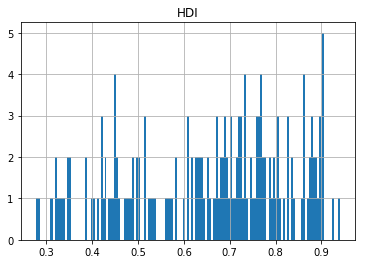

In [29]:
data['HDI'].hist(bins=155)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115d60be0>]], dtype=object)

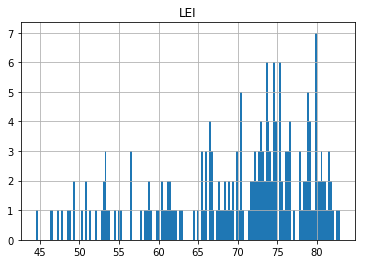

In [32]:
data['LEI'].hist(bins=155)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11747d208>]], dtype=object)

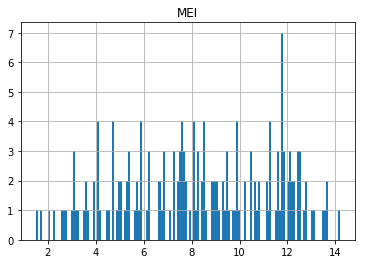

In [35]:
data['MEI'].hist(bins=155)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11767f8d0>]], dtype=object)

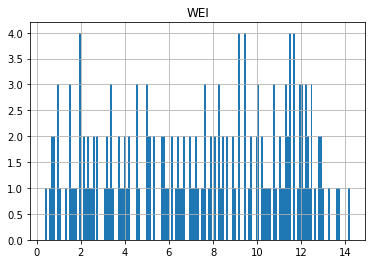

In [36]:
data['WEI'].hist(bins=155)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1178e7470>]], dtype=object)

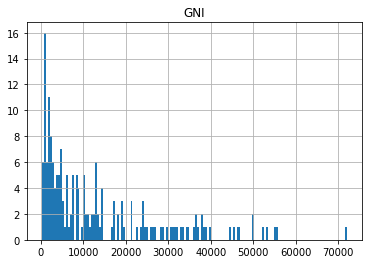

In [37]:
data['GNI'].hist(bins=155)

### Research Question 2  (Replace this header name!)

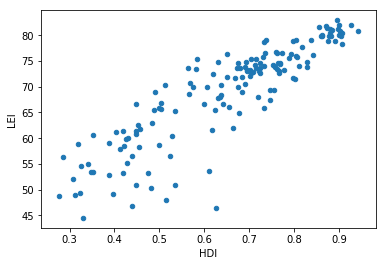

In [26]:
df4.plot.scatter(x='HDI',y='LEI')

In [31]:
df4['HDI'].corr(df4['LEI'])

0.88162010435976934

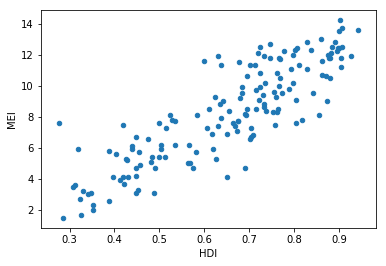

In [39]:
df4.plot.scatter(x='HDI',y='MEI')

In [42]:
df4['HDI'].corr(df4['MEI'])

0.85751366339873092

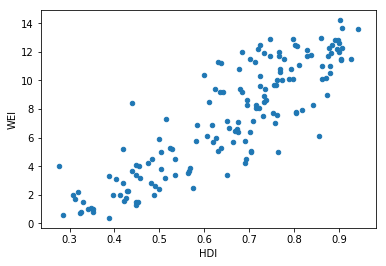

In [40]:
df4.plot.scatter(x='HDI',y='WEI')

In [43]:
df4['HDI'].corr(df4['WEI'])

0.87073001515271919

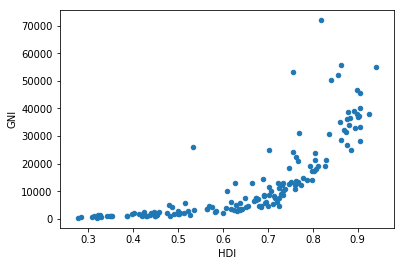

In [41]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df4.plot.scatter(x='HDI',y='GNI')

In [44]:
df4['HDI'].corr(df4['GNI'])

0.76559170847699831

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!